 en la pagina www.warena.co se capturan los datos al momento que un hincha compra una boleta, y el dia del partido las personas que hayan adquirido sus entradas pueden ingresar al estadio, esto se valida con un dispositivo PDA en el cual se escanea la cedula o la boleta de la persona, en ese momento queda registrado una data la cual se denomina Ingresos en el cual se tienen las siguientes caracteristicas ( Fecha de ingreso, Genero, Tipo de entrada, la zona donde se ingresa,  las edadesdocumento, fecha de nacimiento ) en el siguiente proyecto validaremos las tendencias de asistencia al partido america vs bucaramanga, jugado el 15 de febrero , iniciando a las 8pm (20 horas).

In [1]:
#Cargo el archivo csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import string
import matplotlib.dates as mdates
df = pd.read_csv('/vsBucaramanga.csv')
print(df.head())

ModuleNotFoundError: No module named 'pandas'

In [2]:
# Contar los datos nulos por columna
datos_nulos_por_columna = df.isnull().sum()
# muestro la cantidad de datos nulos
print(f"Numero de datos nulos por columna:")
print(datos_nulos_por_columna)

Numero de datos nulos por columna:
NOMBRE EVENTO       6888
DOCUMENTO           6888
NOMBRE PERSONA      6888
NOMBRE DE ZONA      6888
TIPO BOLETA         6888
VALOR               6888
PIN                 6888
FECHA INGRESO       6888
CORREO              6888
CELULAR             6888
FECHA NACIMIENTO    6888
EDAD                6888
GENERO              6888
dtype: int64


identifico datos faltantes del DataFrame, mostrando filas y columnas donde faltan valores.

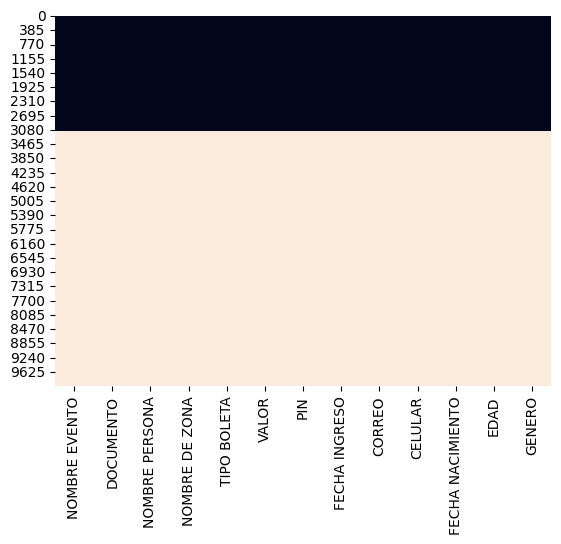

In [3]:
#identifico datos faltantes del DataFrame, mostrando filas y columnas donde faltan valores.
sns.heatmap(df.isnull(), cbar=False)
plt.show()

df.dropna
Esto eliminará todas las filas que contienen al menos un valor NULL NaN en cualquier columna del dataframe df

In [4]:

# Eliminar filas con al menos un valor nulo
df = df.dropna()

 valido que no hayan datos nulos despues del drop, df.isnull().sum()es una expresión de Pandas que se utiliza para contar la cantidad de valores nulos (NaN) en cada columna del dataframe df.
 Luego muestro en pantalla para validar que fue exitoso la eliminación de datos nulos

In [5]:
# valido que no hayan datos nulos despues del drop
datos_nulos_por_columna = df.isnull().sum()
# muestro la cantidad de datos nulos
print(f"Numero de datos nulos por columna:")
print(datos_nulos_por_columna)

Numero de datos nulos por columna:
NOMBRE EVENTO       0
DOCUMENTO           0
NOMBRE PERSONA      0
NOMBRE DE ZONA      0
TIPO BOLETA         0
VALOR               0
PIN                 0
FECHA INGRESO       0
CORREO              0
CELULAR             0
FECHA NACIMIENTO    0
EDAD                0
GENERO              0
dtype: int64


sns.heatmap(df.isnull() Este código utiliza la biblioteca Seaborn para visualizar los valores nulos en un dataframe df como un mapa de calor (heatmap)

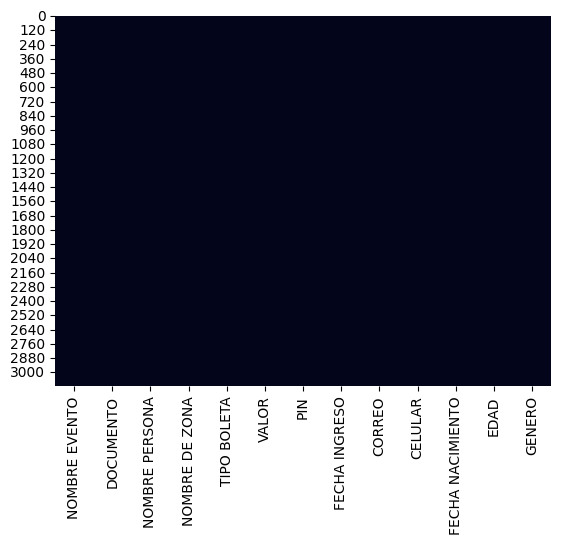

In [6]:
# valido que no hayan datos nulos despues del drop con el grafico
sns.heatmap(df.isnull(), cbar=False)
plt.show()

Muestro los tipos de datos del DATAFRAME df

In [7]:
#mostar los tipos de datos de las columnas
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3112 entries, 0 to 3111
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NOMBRE EVENTO     3112 non-null   object 
 1   DOCUMENTO         3112 non-null   float64
 2   NOMBRE PERSONA    3112 non-null   object 
 3   NOMBRE DE ZONA    3112 non-null   object 
 4   TIPO BOLETA       3112 non-null   object 
 5   VALOR             3112 non-null   float64
 6   PIN               3112 non-null   object 
 7   FECHA INGRESO     3112 non-null   object 
 8   CORREO            3112 non-null   object 
 9   CELULAR           3112 non-null   float64
 10  FECHA NACIMIENTO  3112 non-null   object 
 11  EDAD              3112 non-null   float64
 12  GENERO            3112 non-null   object 
dtypes: float64(4), object(9)
memory usage: 340.4+ KB
None


El método astype se usa en Pandas para cambiar el tipo de datos de una columna

In [8]:
# Convertir 'CELULAR' de float64 a object
df['CELULAR'] = df['CELULAR'].astype('object')
# Convertir 'DOCUMENTO' de float64 a object
df['DOCUMENTO'] = df['DOCUMENTO'].astype('object')
# Convertir 'EDAD' de float64 a entero
df['EDAD'] = df['EDAD'].astype('int')
# Cambio el formato de FECHA INGRESO de a date para su analisis y manipulación
df['FECHA INGRESO'] = pd.to_datetime(df['FECHA INGRESO'], format='%d/%m/%Y %H:%M')
print(df.info())#muestro el tipo de datos despues de convertirlos


<class 'pandas.core.frame.DataFrame'>
Index: 3112 entries, 0 to 3111
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   NOMBRE EVENTO     3112 non-null   object        
 1   DOCUMENTO         3112 non-null   object        
 2   NOMBRE PERSONA    3112 non-null   object        
 3   NOMBRE DE ZONA    3112 non-null   object        
 4   TIPO BOLETA       3112 non-null   object        
 5   VALOR             3112 non-null   float64       
 6   PIN               3112 non-null   object        
 7   FECHA INGRESO     3112 non-null   datetime64[ns]
 8   CORREO            3112 non-null   object        
 9   CELULAR           3112 non-null   object        
 10  FECHA NACIMIENTO  3112 non-null   object        
 11  EDAD              3112 non-null   int64         
 12  GENERO            3112 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(10)
memory usage: 340.4+ KB
None

In [9]:
df.duplicated() #reviso cual fila tengo duplicado

0       False
1       False
2       False
3       False
4       False
        ...  
3107    False
3108    False
3109    False
3110    False
3111    False
Length: 3112, dtype: bool

El método duplicated(keep=False) se utiliza en Pandas para encontrar filas duplicadas en un dataframe
keep=False: Este parámetro indica que todas las filas duplicadas deben marcarse como duplicadas.

In [10]:
#visualizo el registro duplicado
registros_duplicados = df[df.duplicated(keep=False)] #El argumento keep=False marca todos los duplicados como True, incluyendo la primera ocurrencia.
print("Registros duplicados:")
print(registros_duplicados)

Registros duplicados:
             NOMBRE EVENTO     DOCUMENTO                     NOMBRE PERSONA  \
0   AMERICA VS BUCARAMANGA           0.0             ANGELI GOMEZ RODRIGUEZ   
1   AMERICA VS BUCARAMANGA      640434.0                        OSCAR RUIZ    
2   AMERICA VS BUCARAMANGA    10680593.0                     DAYANA GUTAMA    
3   AMERICA VS BUCARAMANGA       11176.0                 Tom eric Kunz Kunz   
4   AMERICA VS BUCARAMANGA       14524.0                 Lion Glosch Glosch   
5   AMERICA VS BUCARAMANGA     1873841.0              Luciana Neira Sanchez   
6   AMERICA VS BUCARAMANGA    30761201.0                    WILMAN RONDON *   
7   AMERICA VS BUCARAMANGA     3111061.0      LOURDES NAYELI LOPEZ GONZALEZ   
8   AMERICA VS BUCARAMANGA    42746289.0     JESUS MANUEL ARELLANO ALBARRAN   
9   AMERICA VS BUCARAMANGA     4877090.0               Jayson Matthew Mejia   
11  AMERICA VS BUCARAMANGA    58332377.0                       ALEX HRISTU    
12  AMERICA VS BUCARAMANGA    

drop_duplicates() se utiliza en Pandas para eliminar filas duplicadas de un dataframe

In [11]:
df= df.drop_duplicates() #elimino duplicados de la data df_sin_duplicados
df
df.duplicated() #valido de nuevo si tengo duplicados

0       False
1       False
2       False
3       False
4       False
        ...  
3107    False
3108    False
3109    False
3110    False
3111    False
Length: 3084, dtype: bool

CUENTO EL NUMERO DE REGISTRO DUPLICADOS CON LA FUNCION duplicated() ADICIONAL SUMO PARA TOTALIZAR

In [26]:
num_registros_duplicados = df.duplicated().sum()
print(f"El número de registros duplicados en el dataframe es: {num_registros_duplicados}")

El número de registros duplicados en el dataframe es: 0


to_csv('datos_limpios.csv'): Este método guarda el dataframe en un archivo CSV llamado 'datos_limpios.csv' en el directorio actual. El parámetro index=False se utiliza para no incluir el índice del dataframe en el archivo CSV.

In [25]:
df.to_csv('datos_limpios.csv', index=False)
from google.colab import files
files.download('datos_limpios.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

value_counts(): Este método cuenta la frecuencia de cada valor único en la columna 'GENERO' y devuelve una serie que muestra el valor único como índice y la frecuencia como valor.
Se obtiene un resultado que muestra cuántas veces aparece cada valor en la columna Genero.
(conteo_genero) = Esto contará los valores únicos en la columna 'GENERO' y almacenará el resultado en la variable para graficar con el valor que resulta.
plt.hist(df['GENERO'],bins = 3) Grafico de Barras

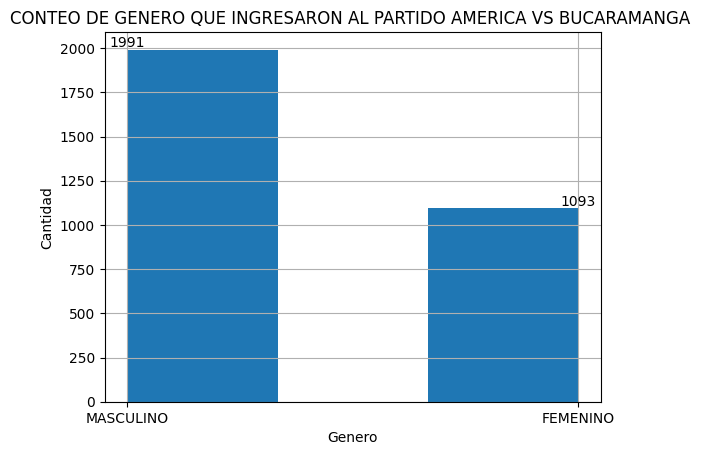

In [14]:
conteo_genero = df['GENERO'].value_counts() # para escribir el total encima de las barras
plt.figure()
plt.hist(df['GENERO'],bins = 3)
plt.title("CONTEO DE GENERO QUE INGRESARON AL PARTIDO AMERICA VS BUCARAMANGA ")
plt.ylabel("Cantidad")
plt.xlabel("Genero")
plt.grid(True)

for index, value in enumerate(conteo_genero):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

Para convertir los valores de un gráfico de pastel a porcentajes, se utiliza el parámetro autopct en la función plt.pie()
(conteo_genero) = Esto contará los valores únicos en la columna 'GENERO' y almacenará el resultado en la variable para graficar con el valor que resulta.
plt.pie Grafico de torta

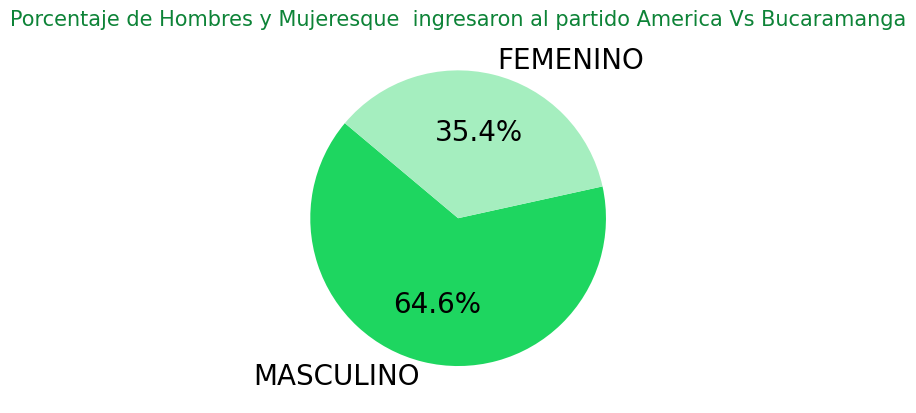

In [15]:
# Contar el número de hombres y mujeres
conteo_genero = df['GENERO'].value_counts()

# Crear un gráfico de torta con el color de la fuente cambiado
plt.pie(conteo_genero, labels=conteo_genero.index, autopct='%1.1f%%', startangle=140, colors=['#1ed660', '#a5eebf'],
        textprops={'color': "black", 'fontsize':20})  # Cambio aquí elcolor deltexto
plt.title('Porcentaje de Hombres y Mujeresque  ingresaron al partido America Vs Bucaramanga', color='#0d8337',fontsize=15)  # Cambio opcional para el título
plt.show()

In [16]:
df.describe()

,VALOR,FECHA INGRESO,EDAD
count,3084.000000,3084,3084.000000
mean,86159.533074,2024-02-15 19:28:00.894941440,22.733463
min,0.000000,2024-02-15 16:40:00,2.000000
25%,0.000000,2024-02-15 19:00:00,21.000000
50%,32000.000000,2024-02-15 19:34:00,22.000000
75%,60000.000000,2024-02-15 20:00:00,23.000000
max,500000.000000,2024-02-15 21:20:00,55.000000
std,155026.871903,NaN,3.165092


bins = np.arange(0, 60, 4): Crea un arreglo de números que va desde 0 hasta 60 (sin incluir 60) con incrementos de 4 unidades

plt.hist(df['EDAD'], CreO el grafico utilizando los datos de la columna 'EDAD' del df

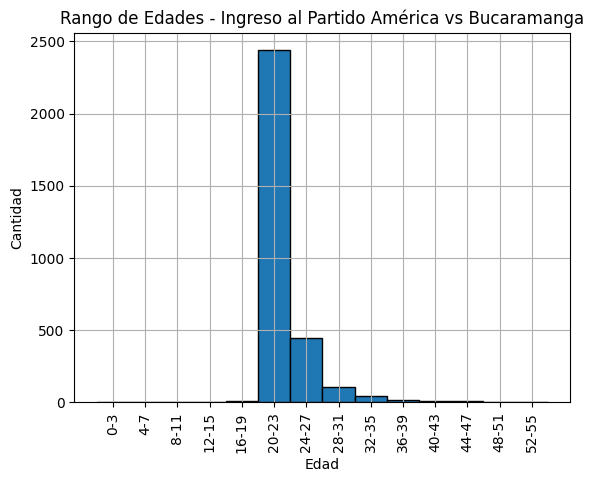

In [17]:
# Definir los límites de los bins
#Como la edad maxima es 55 entonces
bins = np.arange(0, 60, 4)  # Crea un arreglo que va de 0 a 60 con pasos de 4, para visualizar mejor las edades
plt.hist(df['EDAD'], bins=bins, edgecolor='black')
# Añadir títulos y etiquetas
plt.title("Rango de Edades - Ingreso al Partido América vs Bucaramanga")
plt.xlabel("Edad")
plt.ylabel("Cantidad")
plt.grid(True)
# Calcular las posiciones para las etiquetas del eje x
posiciones = [(a+b)/2 for a, b in zip(bins[:-1], bins[1:])]
etiquetas = [f"{int(a)}-{int(b)-1}" for a, b in zip(bins[:-1], bins[1:])]
# Ajustar las etiquetas del eje x
plt.xticks(posiciones, etiquetas, rotation=90)  # 90 grados de los rotulos para mejor visualización
# Mostrar el gráfico
plt.show()

df.groupby('TIPO BOLETA') agrupo los datos por el tipo de boleta y calculo el tamaño (totalizo) de cada grupo.
plot(kind='barh') gráfico las barras de manera horizontal
con el for hago el ciclo para iterar sobre los valores de cada tipo de boleta y agrega las etiquetas a la gráfica para contar cada tipo de boleta

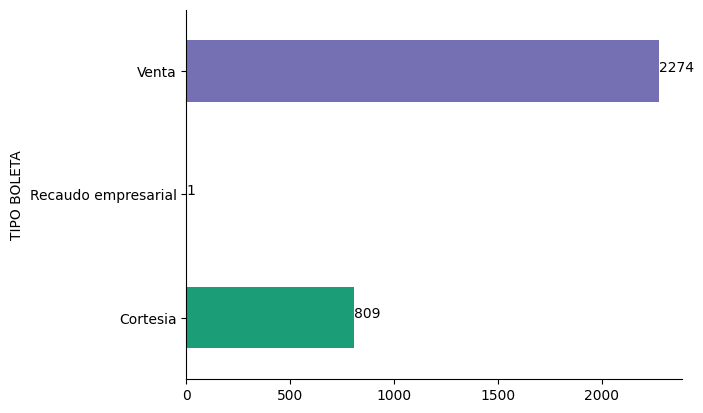

In [18]:
# MOSTRAR EL TIPO BOLETA
df.groupby('TIPO BOLETA').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
# Ocultar los bordes superior y derecho
plt.gca().spines[['top', 'right',]].set_visible(False)
# Mostrar los valores en la gráfica
for index, value in enumerate(df.groupby('TIPO BOLETA').size()):
    plt.text(value, index, str(value))

plt.show()

df['TIPO BOLETA'].value_counts() cuento los valores de cada tipo de boleta
y hago el grafico de torta con plt.pie

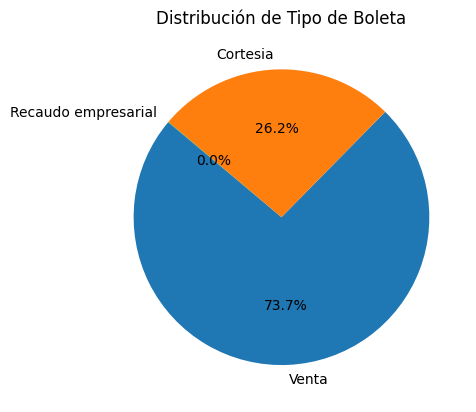

In [19]:
#MOSTAR EL TIPO DE BOLETA EN GRAFICO DE TORTA
# Agrupar por 'TIPO BOLETA' y contar
conteo_tipos = df['TIPO BOLETA'].value_counts()

# Generar el gráfico de torta

plt.pie(conteo_tipos, labels=conteo_tipos.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Tipo de Boleta')
plt.show()

df.groupby('NOMBRE DE ZONA') para agrupar , ordenar, contar esta caracteristica la tribuna o zona para saber cuantos ingresos se tuvieron, adicional dfg = df.copy(): Creo una copia dee df llamada dfg para evitar modificar el dataframe original mientras se trabaja con los datos.

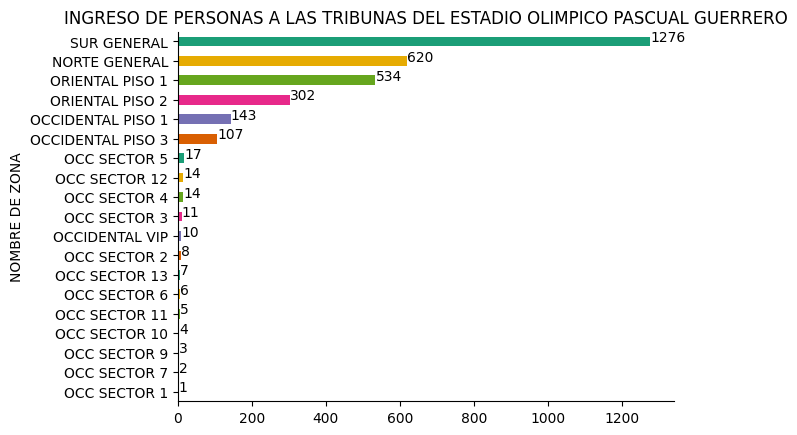

In [20]:
# MOSTRAR EL NUMERO DE INGRESO A LAS DIFRENTES TRIBUNAS
dfg = df.copy()
dfg.groupby('NOMBRE DE ZONA').size().sort_values(ascending=True).plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
# Ocultar los bordes superior y derecho
plt.gca().spines[['top', 'right',]].set_visible(False)
# Mostrar los valores en la gráfica
for index, value in enumerate(dfg.groupby('NOMBRE DE ZONA').size().sort_values(ascending=True)):
    plt.text(value, index, str(value))
plt.title('INGRESO DE PERSONAS A LAS TRIBUNAS DEL ESTADIO OLIMPICO PASCUAL GUERRERO')
plt.show()

In [21]:
# Agrupar por 'NOMBRE DE ZONA' y sumar los 'VALOR'
valor_total_por_zona = df.copy()
valor_total_por_zona = valor_total_por_zona.groupby('NOMBRE DE ZONA')['VALOR'].sum()
# Mostrar el resultado
print(valor_total_por_zona)
#Sumo la totalidad de las zonas
valor_total = valor_total_por_zona.sum()
print(f"\nEl valor total fue de :",valor_total)

NOMBRE DE ZONA
NORTE GENERAL         35676000.0
OCC SECTOR 1             82000.0
OCC SECTOR 10          2000000.0
OCC SECTOR 11                0.0
OCC SECTOR 12          1148000.0
OCC SECTOR 13           574000.0
OCC SECTOR 2           1074000.0
OCC SECTOR 3           1320000.0
OCC SECTOR 4            500000.0
OCC SECTOR 5           2582000.0
OCC SECTOR 6           3000000.0
OCC SECTOR 7           1000000.0
OCC SECTOR 9           1500000.0
OCCIDENTAL PISO 1     10424000.0
OCCIDENTAL PISO 3      6772000.0
OCCIDENTAL VIP               0.0
ORIENTAL PISO 1       46655000.0
ORIENTAL PISO 2       31340000.0
SUR GENERAL          120069000.0
Name: VALOR, dtype: float64

El valor total fue de : 265716000.0
